In [21]:
# -*- coding: utf-8 -*-

%matplotlib inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [22]:
# 한글처리
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 13

# Plotting with numerical data

In [23]:
#tips는 seaborn이 제공하는 데이터
tips = sns.load_dataset("tips")
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

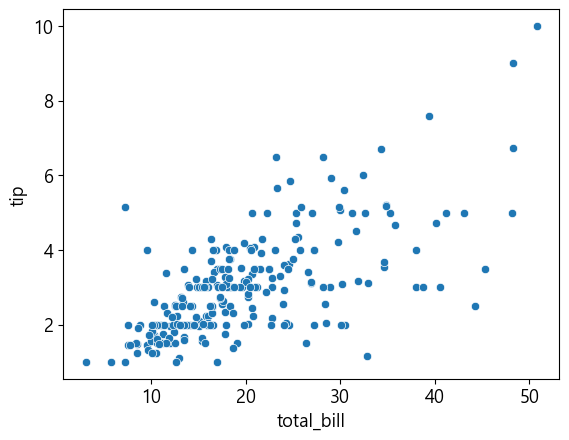

In [25]:
#Scatter Plots
sns.scatterplot(x="total_bill",y="tip",data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

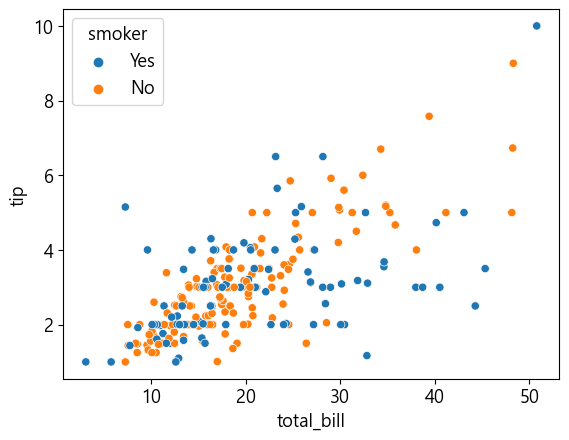

In [26]:
#hue
sns.scatterplot(x="total_bill",y="tip",hue="smoker",data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

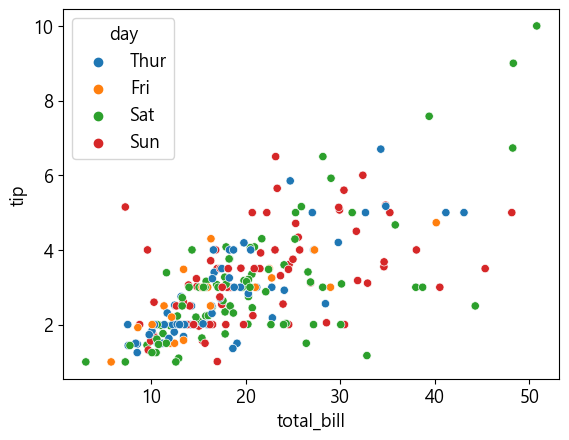

In [28]:
#hue
sns.scatterplot(x="total_bill",y="tip",hue="day",data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

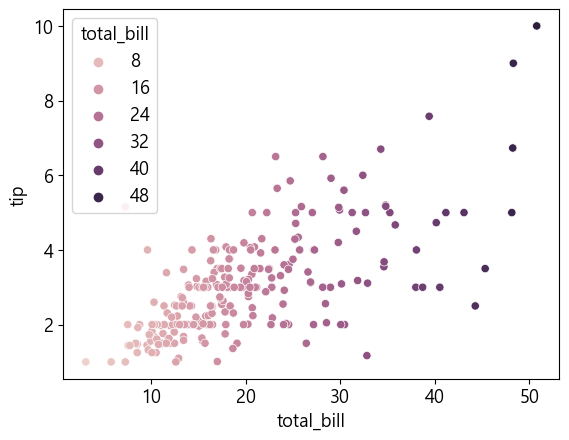

In [29]:
#hue를 수로 했을 때?
sns.scatterplot(x="total_bill",y="tip",hue="total_bill",data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

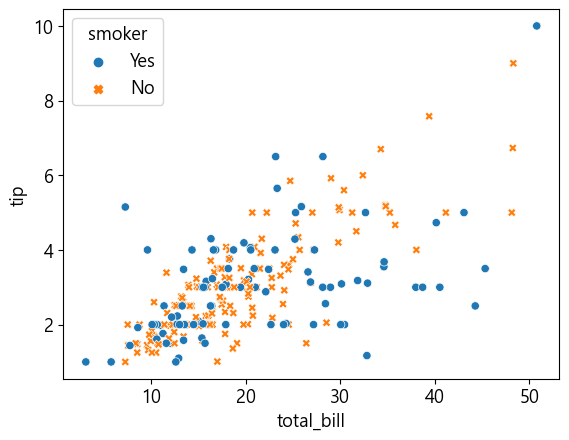

In [35]:
#hue의 style argument (marker style을 의미)
sns.scatterplot(x="total_bill",y="tip",hue="smoker",style="smoker",data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

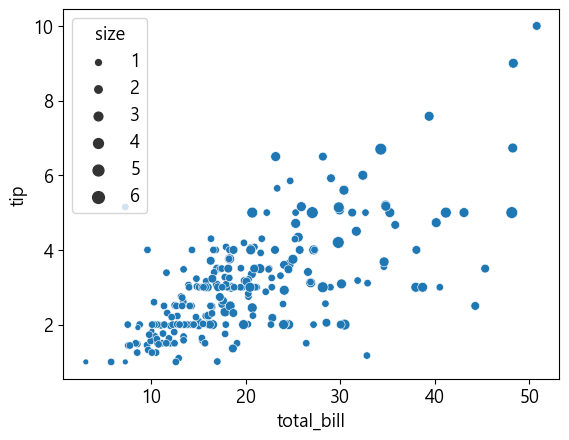

In [31]:
#marker size control
sns.scatterplot(x="total_bill",y="tip",size="size",data=tips)

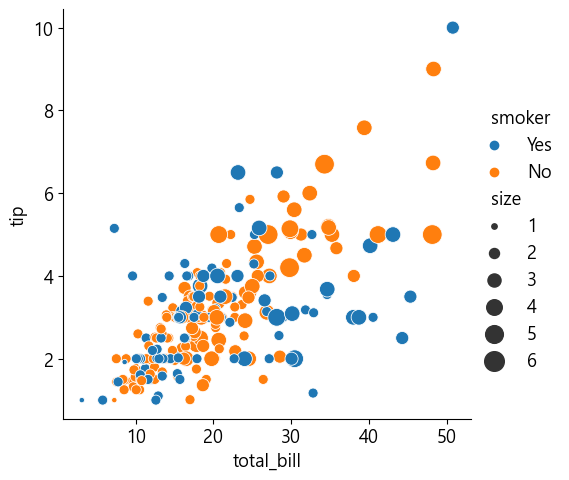

In [36]:
#marker의 상한과 하한
#relplot의 도입 seaborn.relplot()이나 seaborn.scatterplot()은 뭔가를 return함.
#replot의 default는 lineplot이며 lineplot과 relplot 혼합 지원 하지만 단일도 지원
#하기 때문에 relplot으로 사용하자!!
sns.relplot(x="total_bill",y="tip",hue="smoker",size="size",
           sizes=(15,200),data=tips,kind='scatter')

<seaborn.axisgrid.FacetGrid at 0x241e8e83dc0>
relplot() 함수가 return하는 변수의 설명, at 뒤는 메모리 주소!

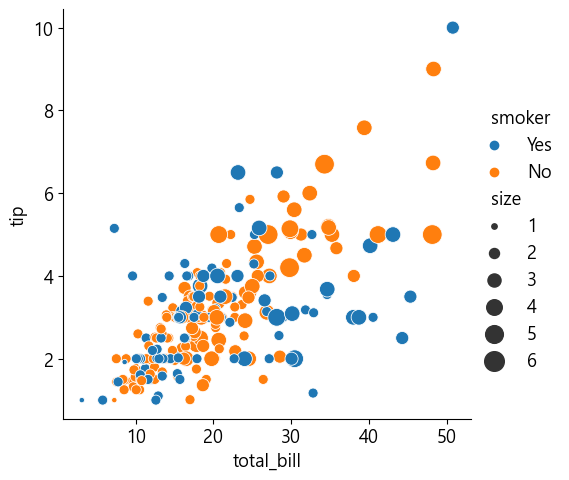

In [34]:
#무언갈 return한다고 했기 때문에 변수에 넣어주자. 
#근데 안나옴. 이미 그려진 g위에 제목을 추가하는 코드이기 때문에
g = sns.relplot(x="total_bill",y="tip",hue="smoker",size="size",
                sizes=(15,200),data=tips,kind='scatter')
g = g.set_titles('scatter plot example')

# Utils

Text(0.5, 1.0, 'scatter plot example')

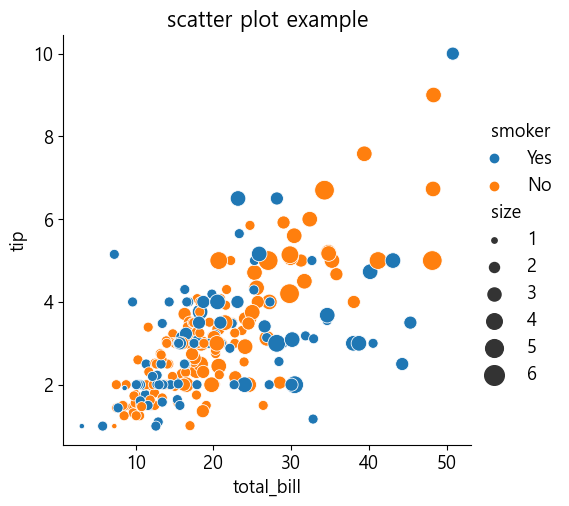

In [39]:
g = sns.relplot(x="total_bill",y="tip",hue="smoker",size="size",
               sizes=(15,200), data=tips, kind='scatter')
plt.title('scatter plot example')

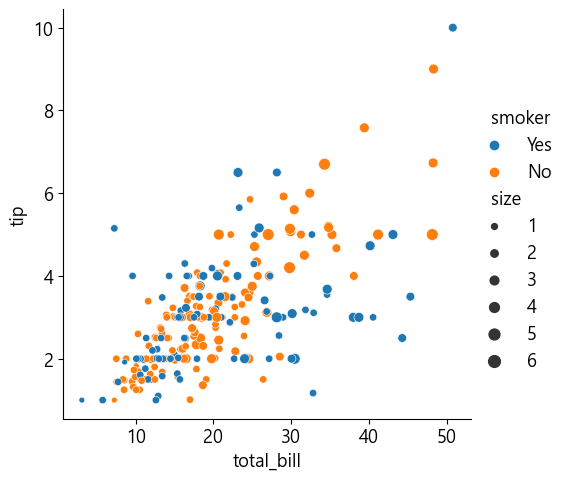

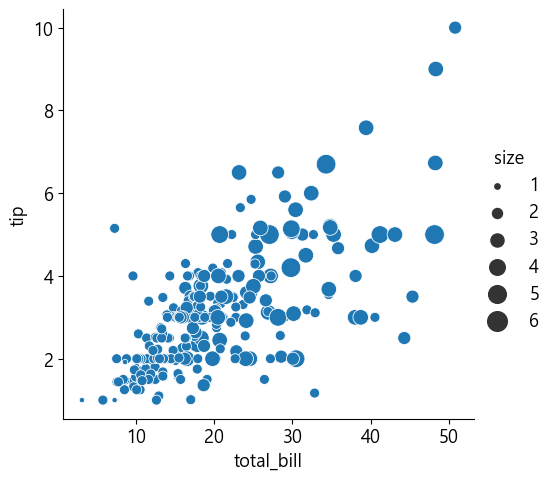

In [40]:
#scatterplot보다 relplot이 savefig기능을 구현할 때 코드 절약!
#근데 g1은 default인데 왜 scatter임?
g0 = sns.relplot(x="total_bill",y="tip",hue="smoker",
                size="size",data=tips,kind='scatter')
g1 = sns.relplot(x="total_bill",y="tip",size="size",
                sizes=(15,200),data=tips)

g0.savefig('total_bill_tip_various_color_by_size.png')
g1.savefig('total_bill_tip_various_color_by_size.png')

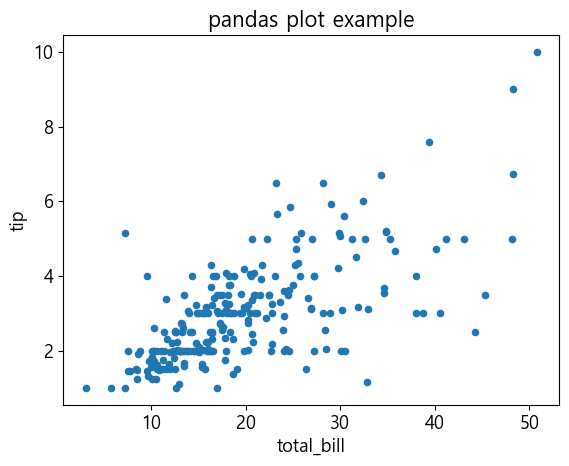

In [41]:
#pandas df plot savefig를 이용하기 위해 Figure을 만들어줘야해!
#return을 변수로 받지 않았음에 주목! matplotlib은 항상 마지막에 그린 그림을..
#df plot함수의 return type : Not figure but AxesSubplot
g = tips.plot(x = 'total_bill',y='tip',kind='scatter',title='pandas plot example')
g = g.get_figure()
g.savefig('pandas_plot_example.png')

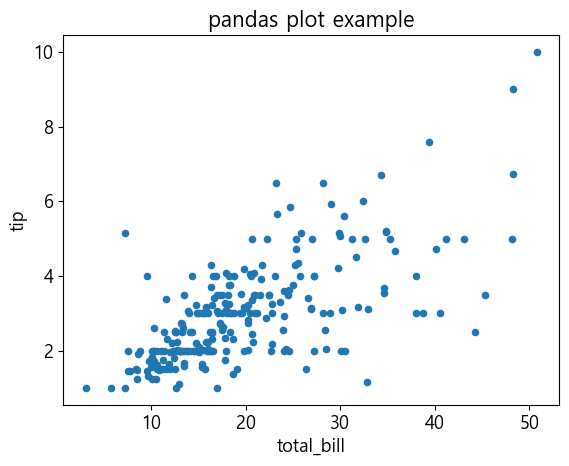

In [43]:
#바로 저장 근데 쓰지말자 혼동 o
ax = tips.plot(x='total_bill',y='tip',kind='scatter',title='pandas plot example')
plt.savefig('pandas_plot_example_2.png')

In [44]:
#relplot() 두 번 이용 -> 각각의 그림 scatterplot() -> 그림 겹치기
#random noise data create
data = {
    'x': np.random.random_sample(100) * 50,
    'y': np.random.random_sample(100) * 10
}
random_noise_df = pd.DataFrame(data, columns=['x','y'])
random_noise_df.head(5)

,x,y
0,28.395863,0.789034
1,27.304514,9.726620
2,1.854347,2.703163
3,39.672545,5.495614
4,7.006319,8.198121


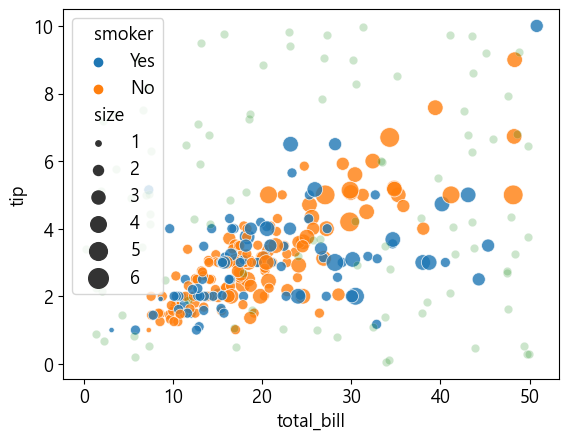

In [46]:
#메모리 주소도 당연히 같다
g0 = sns.scatterplot(x = "total_bill",y="tip",hue='smoker',
                    alpha=0.8,size="size",sizes=(15,200),data=tips)
g1 = sns.scatterplot(x="x",y="y",alpha=0.2,color='g',data=random_noise_df)

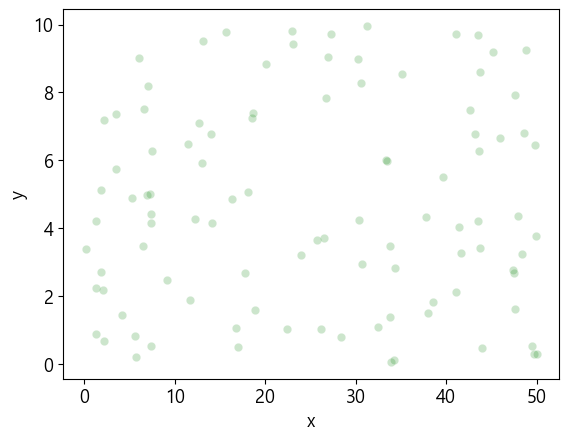

In [49]:
#Matplotlib은 현재 Figure가 닫히지 않으면 계속 그 Figure위에 덧그리는 형식!!
g0 = sns.scatterplot(x="total_bill", y="tip", hue='smoker',
    alpha=0.8, size="size", sizes=(15, 200), data=tips)
plt.close() #요걸로 닫아주기
g1 = sns.scatterplot(x="x", y="y", alpha=0.2, color='g', data=random_noise_df)

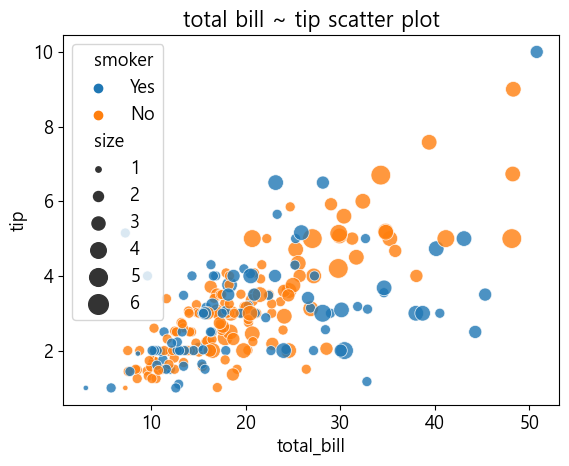

In [50]:
#제목을 추가하여 figure로 다시 만들기?
g0.set_title('total bill ~ tip scatter plot')
g0.get_figure()

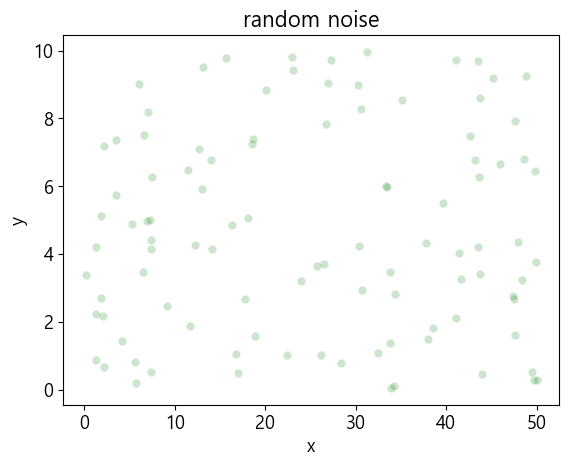

In [51]:
#g0,g1 메모리 주소 다르다.
g1.set_title('random noise')
g1.get_figure()

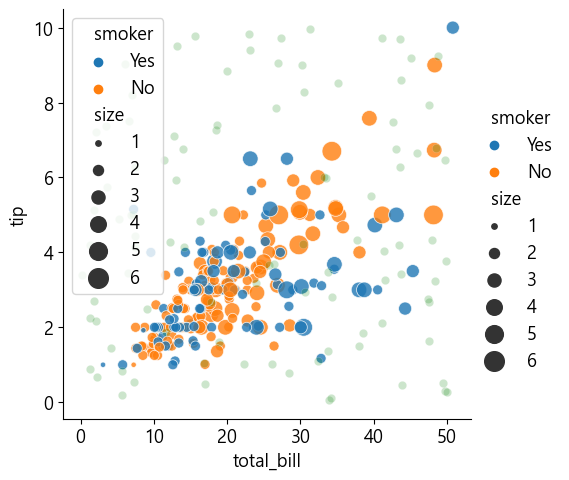

In [52]:
#relplot() 함수 호출하니 이전에 그리던 Figure 모두 닫힘을 알 수 있음.
#교훈 : 새 그림을 그릴 때에는 습관적으로 close()함수를 호출해주자.
g0 = sns.relplot(x="total_bill",y="tip",hue='smoker',
                alpha=0.8, size="size",sizes=(15,200), data=tips)
g1 = sns.scatterplot(x="x",y="y",alpha=0.2,color='g',data=random_noise_df)

# Plotting with numerical data 2

# line Plots

In [55]:
#시계열 데이터는 line plot이쥐 *cumsum()함수 : 값 누적 함수
data = {
    'time': np.arange(500),
    'value':np.random.randn(500).cumsum()
}
df = pd.DataFrame(data)
df.head(5)

,time,value
0,0,-2.986118
1,1,-3.299101
2,2,-4.560868
3,3,-4.944242
4,4,-4.464262


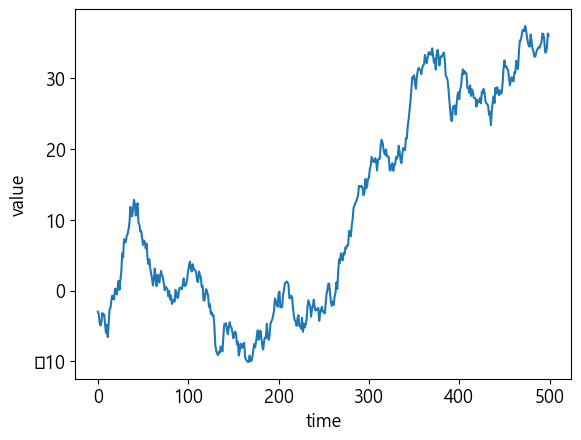

In [56]:
g = sns.lineplot(x="time",y="value",data=df)

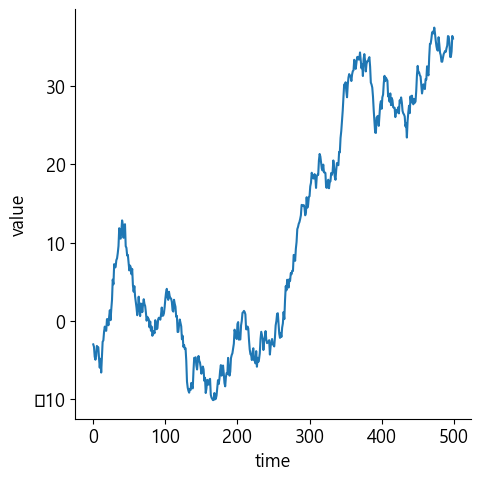

In [58]:
#lineplot()과 replot()에서 kind를 'line'으로 정의하는 것의 결과는 같지만 
#return type이 다르다.
#x 중심 
g = sns.relplot(x="time",y="value",kind="line",data=df)

In [62]:
#2차원 데이터 500개 생성 (데이터 정렬 시각화를 위해)
data = np.random.randn(500,2).cumsum(axis=0)
df = pd.DataFrame(data,columns=["x","y"])
df.head(5)

,x,y
0,-0.866338,0.662776
1,-0.876164,0.928260
2,-0.350025,0.909389
3,1.157416,2.667585
4,1.078457,4.397814


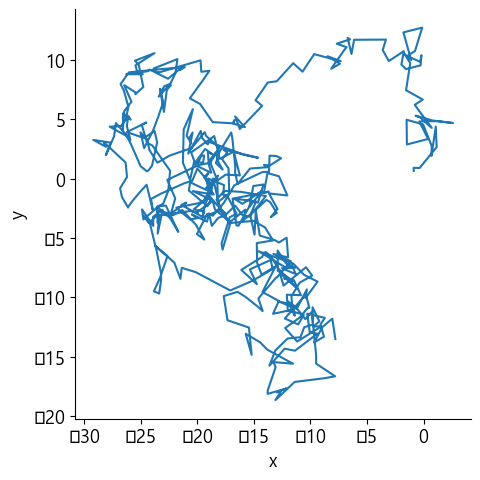

In [63]:
g = sns.relplot(x="x",y="y",sort=False,kind="line",data=df)

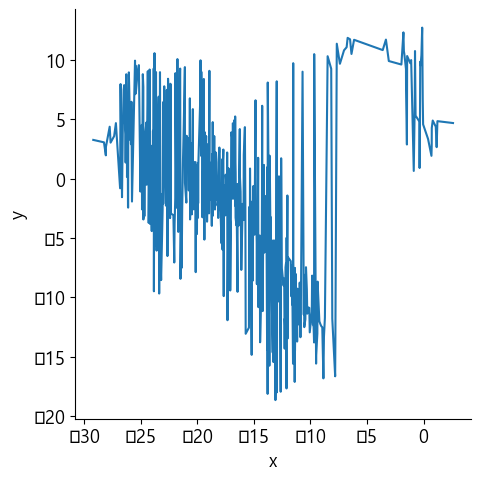

In [64]:
g = sns.relplot(x="x", y="y", sort=True, kind="line", data=df)

In [66]:
#lineplot은 신뢰구간과 추정회귀선을 손쉽게 그려준다.
#fmri 데이터는 대상자(subject)의 활동(event)에 따라 시점(timepoint)별로 fmri의
#측정값 중 하나의 센서값을 정리한 시계열 데이터
fmri = sns.load_dataset("fmri")
fmri.head(5)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


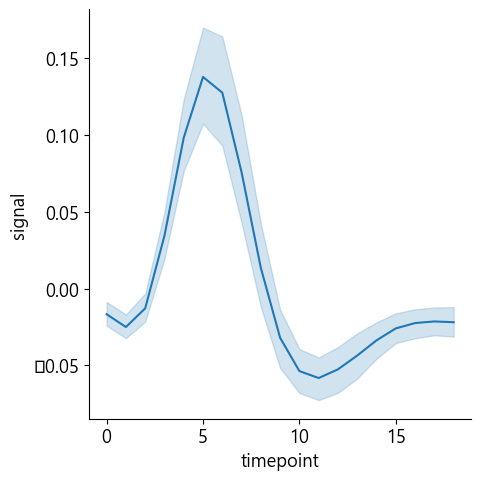

In [68]:
#lineplot의 default는 신뢰 구간과 추정 회귀선
g = sns.relplot(x="timepoint",y="signal",kind="line",data=fmri)

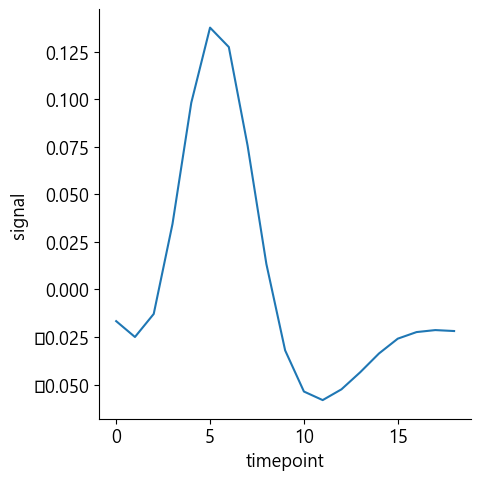

In [69]:
#confidence interval의 약자 ci
g = sns.relplot(x="timepoint",y="signal",kind="line",data=fmri,ci=None)

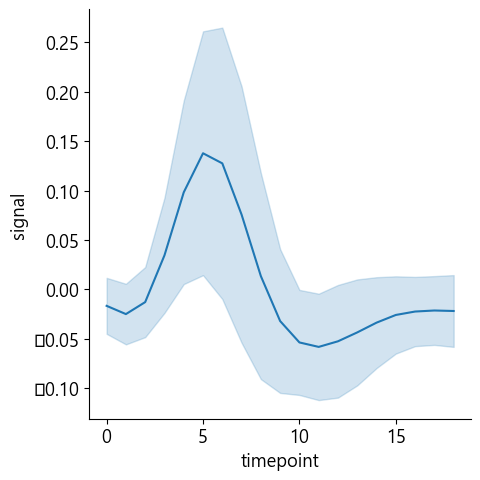

In [70]:
#표준편차를 이용하여 confidence interval을.. (standard deviation)
g = sns.relplot(x = "timepoint",y="signal",kind="line",data=fmri,ci="sd")

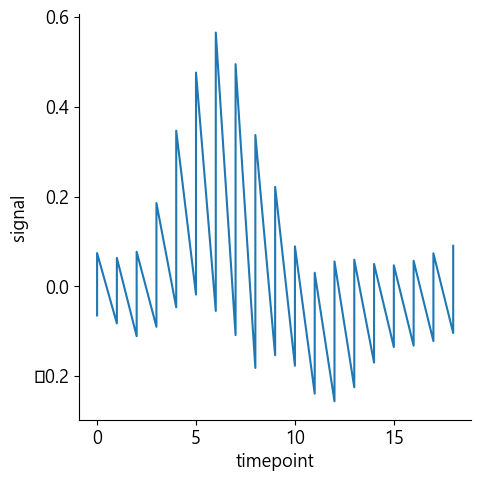

In [71]:
#추정 회귀선이 없으니 마치 주파수
g = sns.relplot(x="timepoint",y="signal",kind="line",data=fmri,estimator=None)

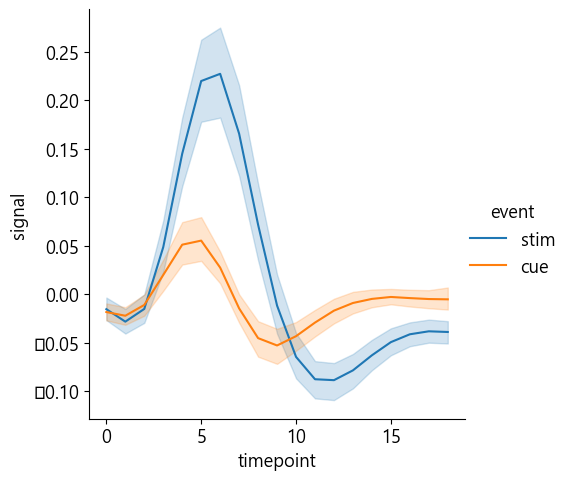

In [72]:
g = sns.relplot(x="timepoint",y="signal",hue="event",kind="line",data=fmri)

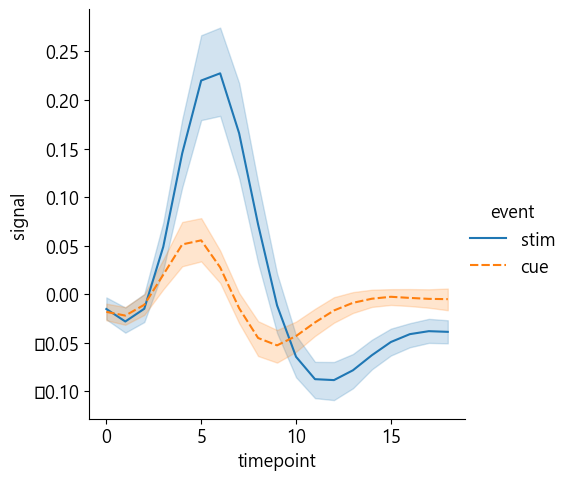

In [73]:
g = sns.relplot(x="timepoint",y="signal",hue="event",
               style="event",kind="line",data=fmri)

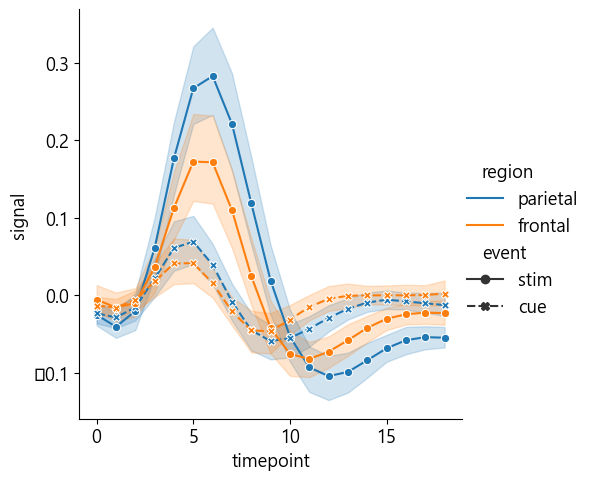

In [74]:
g = sns.relplot(x="timepoint",y="signal",hue="region",style="event",
               markers=True,kind="line",data=fmri)

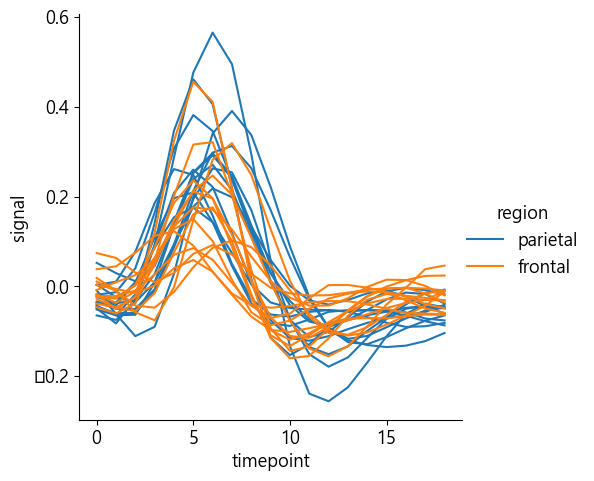

In [76]:
#선의 색은 region하지만 각 선은 subject에 대해 중복으로 그릴 경우
#estimator=None으로 설정하지 않으면 syntax error
#가독성 매우 낮음
g = sns.relplot(x="timepoint", y="signal", hue="region",
    units="subject", estimator=None,kind="line",
    data=fmri.query("event == 'stim'"))

# Date data

In [77]:
data = {
    'time' : pd.date_range("2023-04-07",periods=500),
    'value':np.random.randn(500).cumsum()
}
df = pd.DataFrame(data)
df.head(5)

,time,value
0,2023-04-07,0.950684
1,2023-04-08,0.289205
2,2023-04-09,1.872982
3,2023-04-10,1.936973
4,2023-04-11,3.227963


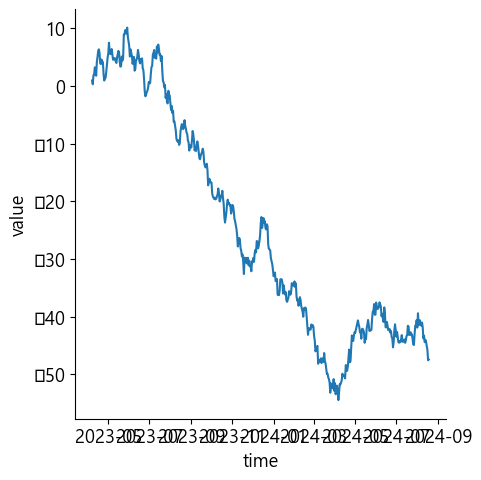

In [79]:
g = sns.relplot(x="time",y="value",kind="line",data=df)

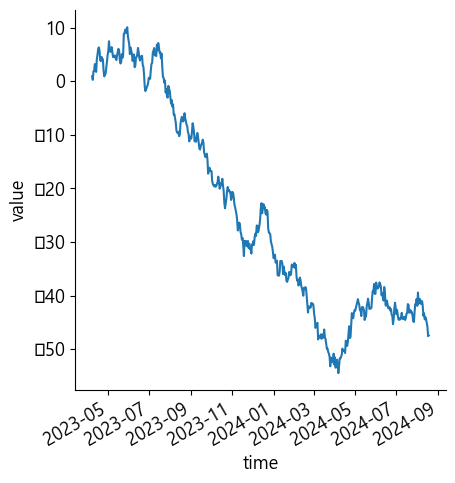

In [80]:
g = sns.relplot(x="time",y="value",kind="line",data=df)
g.fig.autofmt_xdate()

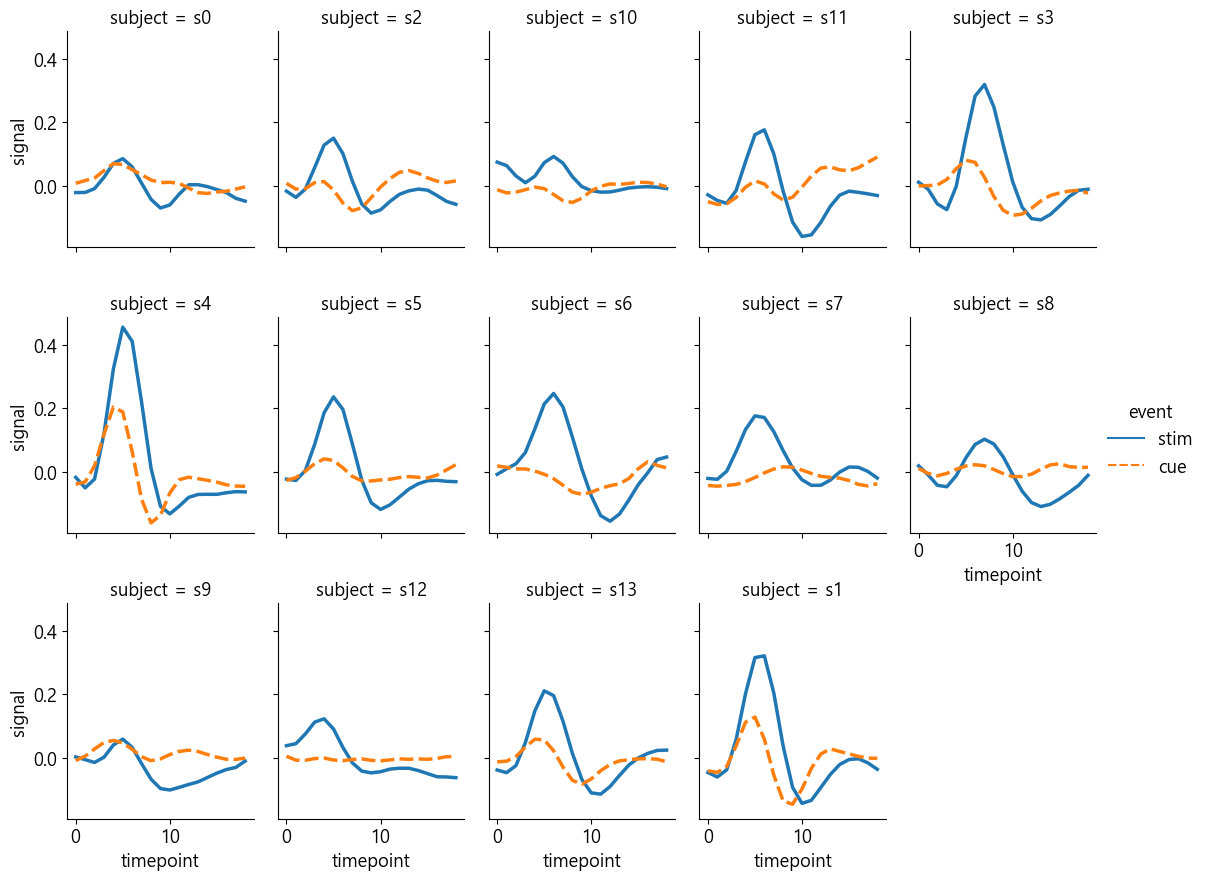

In [83]:
#scatterplot의 return type은 AxesSubplot relplot의 return type은 FacetGrid
#aspect:비 height : 각각그래프의 높이
g = sns.relplot(x="timepoint",y="signal",hue="event",style="event",
               col="subject",col_wrap=5,height=3,aspect=.75,linewidth=2.5,
               kind="line",data=fmri.query("region == 'frontal'"))

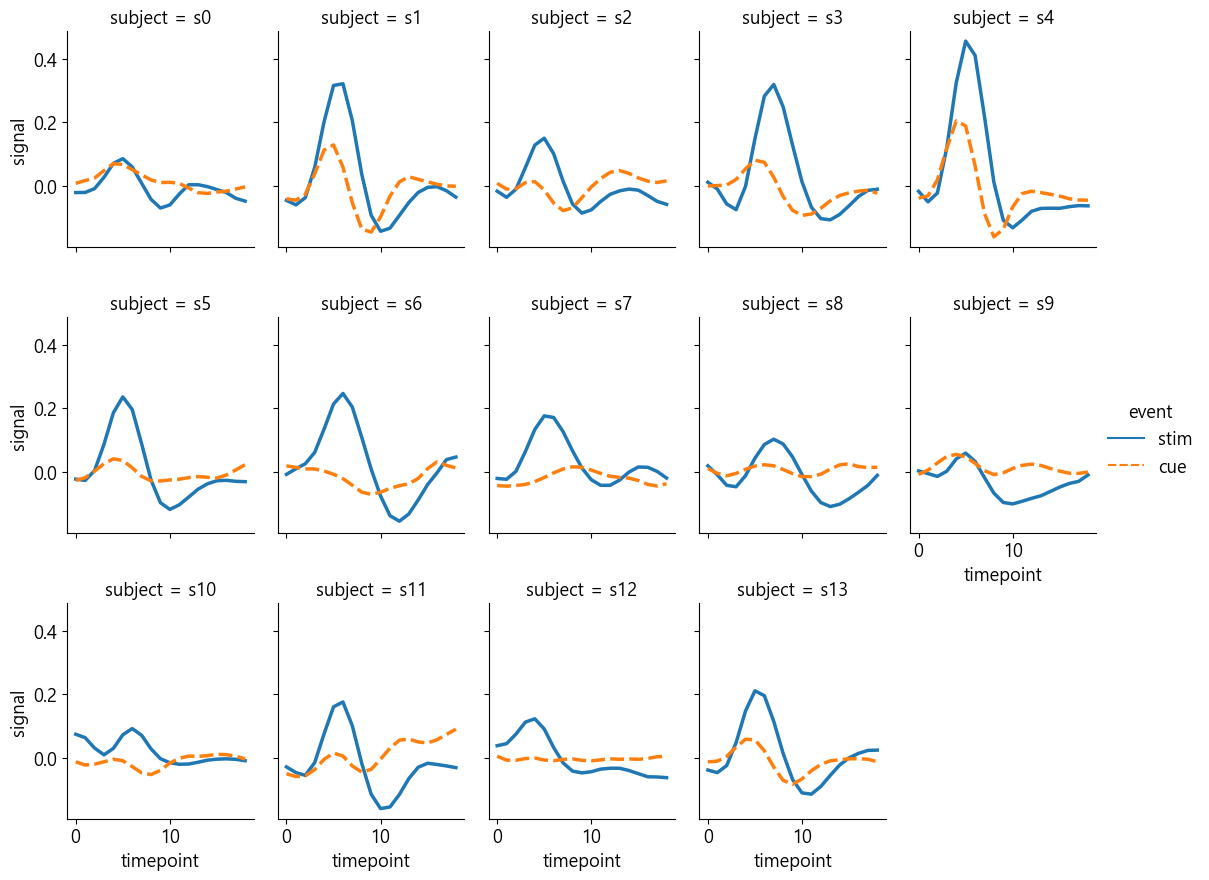

In [88]:
#col_oreder과 row_order
col_order = [f's{i}' for i in range(14)]
g = sns.relplot(x="timepoint",y="signal",hue="event",style="event",
               col="subject",col_wrap=5,height=3,aspect=.75,linewidth=2.5,
               kind="line",data=fmri.query("region == 'frontal'"),
                col_order=col_order
               )

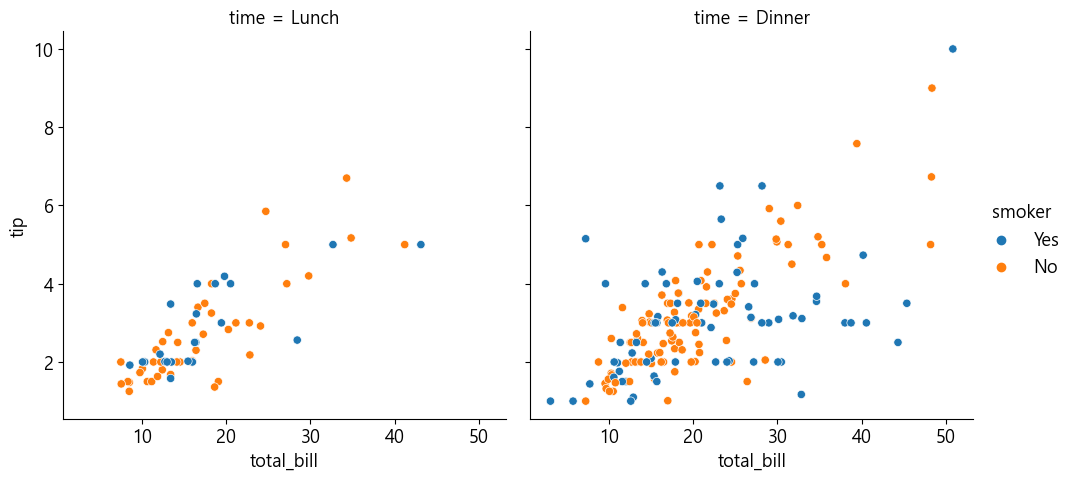

In [89]:
g = sns.relplot(x="total_bill",y="tip",hue="smoker",data=tips,col="time")

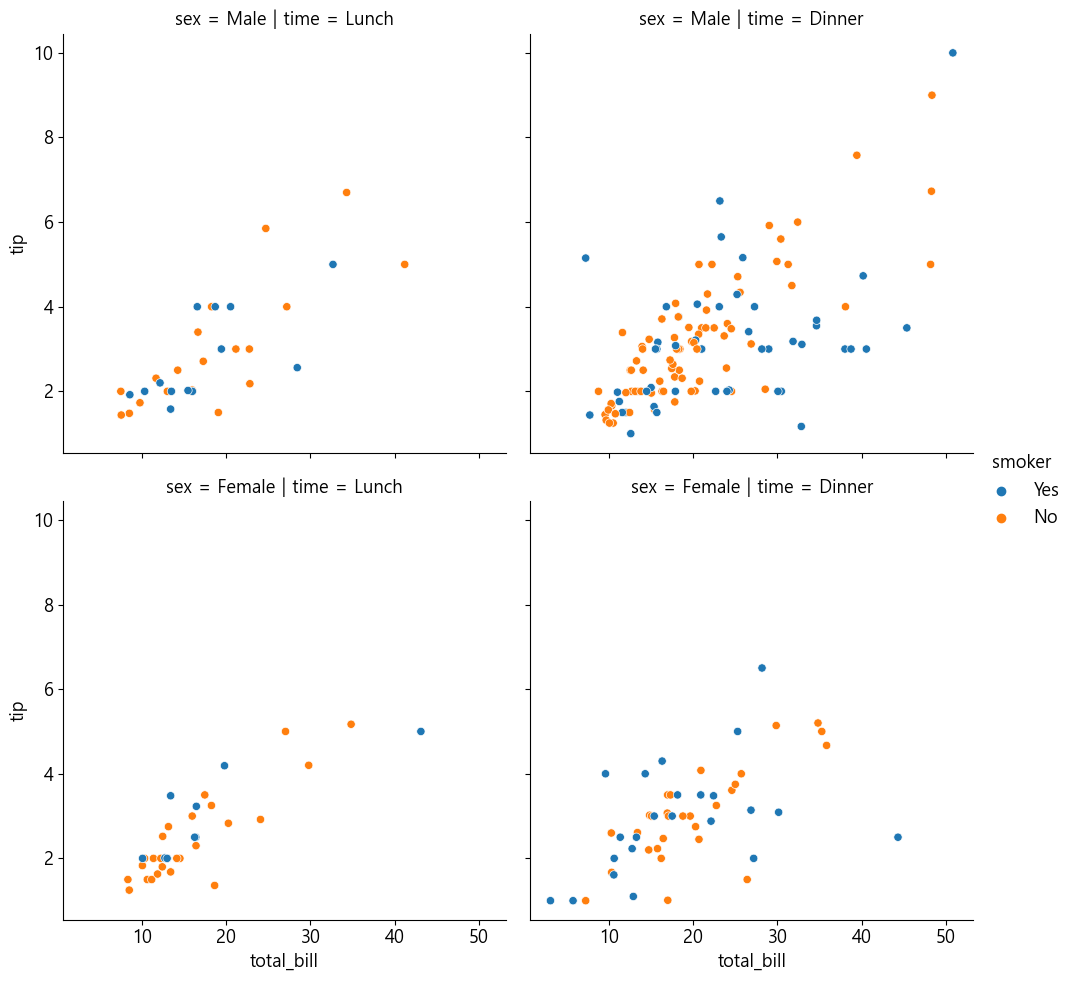

In [90]:
g = sns.relplot(x="total_bill", y="tip", hue="smoker",
    data=tips, col="time", row="sex")

# Plotting with categorical data